In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Store: Store number**  

**Date: Sales week start date**  

**Weekly_Sales: Sales**  

**Holiday_Flag: Mark on the presence or absence of a holiday**  

**Temperature: Air temperature in the region**  

**Fuel_Price: Fuel cost in the region**  

**CPI: Consumer price index**  

**Unemployment: Unemployment rate**

In [2]:
df = pd.read_csv("Walmart_sales.csv")
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
df.shape

(6435, 8)

In [5]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
cols = [col for col in df.columns if col not in ['Date']]
df_without_date = df[cols]

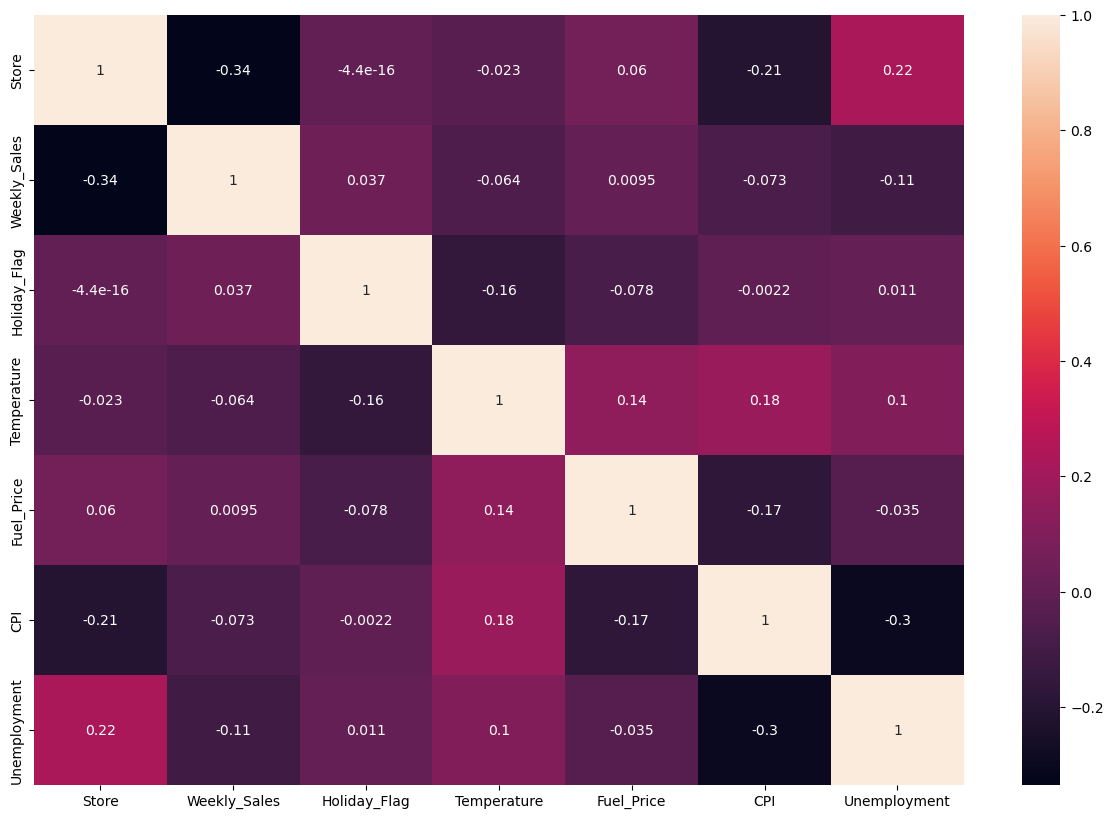

In [7]:
plt.figure(figsize=(15,10))
corr = df_without_date.corr()
ax = sns.heatmap(corr, annot=True)

<h1> Видим, что для таргета Weekly_sales самая высокая корреляция наблюдается у Unemployment<h1>

<function matplotlib.pyplot.show(close=None, block=None)>

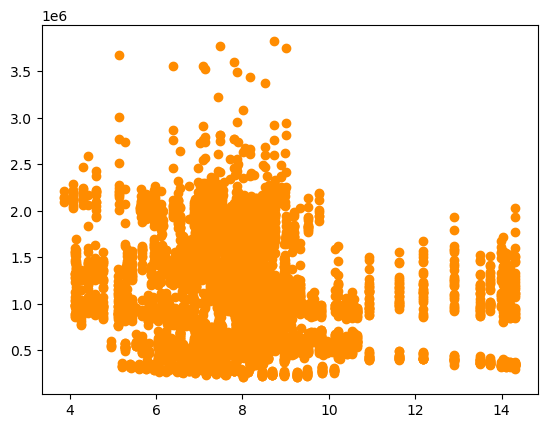

In [8]:
plt.scatter(df['Unemployment'], df['Weekly_Sales'], color='darkorange', 
            label='data') 
plt.show

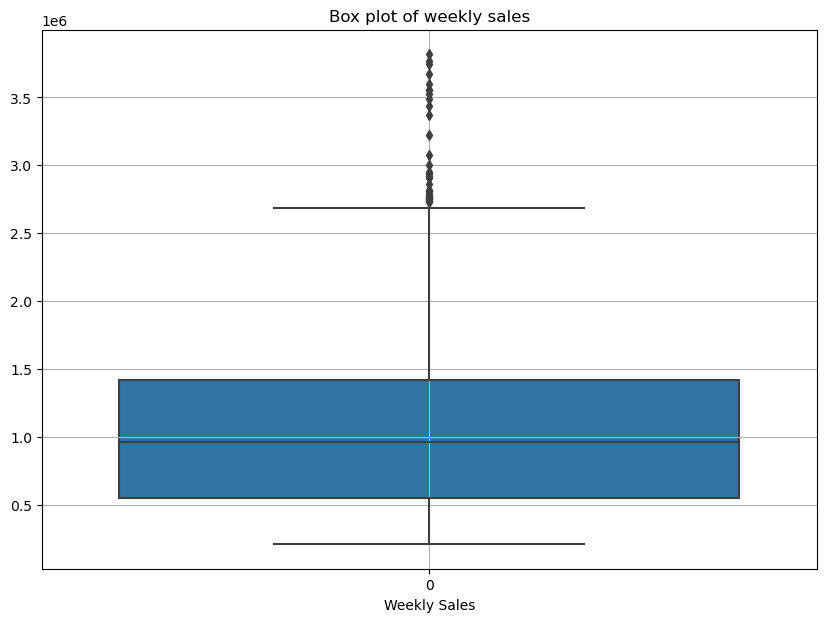

In [9]:
# box plot
plt.figure(figsize=(10, 7))
sns.boxplot(df['Weekly_Sales'])
plt.xlabel("Weekly Sales")
plt.title("Box plot of weekly sales")
plt.grid(True)

<h1> Устроняем выбросы с помощью метода IQR <h1>

In [10]:
Q1 = df["Weekly_Sales"].quantile(0.25)
Q3 = df["Weekly_Sales"].quantile(0.75)

#fing IQR
IQR = Q3-Q1

lower_bound = Q1-IQR*1.5
upper_bound = Q3+IQR*1.5

In [11]:
# 25% значений Weekly_Sales ниже этого числа
Q1

553350.105

In [12]:
# 25% значений Weekly_Sales выше этого числа
Q3

1420158.66

In [13]:
# "Расстояние" между нижней и верхней границей
IQR

866808.5549999999

In [14]:
lower_bound

-746862.7275

In [15]:
upper_bound

2720371.4924999997

In [16]:
df_without_outliers = df[(df["Weekly_Sales"]>=lower_bound ) & (df["Weekly_Sales"]<=upper_bound)]

In [17]:
X = df_without_outliers.drop(['Weekly_Sales', 'Date'],axis=1)
Y = df_without_outliers['Weekly_Sales']


<h1> Линейная регрессия <h1>

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state = 42)

In [19]:
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge,Lasso

In [20]:
# изменяем масштаб
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print(predictions[:15])

[1319309.07920929  843503.45346952  741575.3319016  1225255.2547482
 1256727.72562139  709167.89878628  714982.77488819  738257.26427124
 1182336.77903437  954372.9269526   841457.20340282  937972.04883685
 1465601.41408327  740725.20344555  847817.62833169]


In [22]:
model.score(X_test,y_test)

0.15743801697205062

In [23]:
mean_absolute_error(y_test, predictions)

431583.5204237343

In [24]:
ridge=Ridge(alpha = 10000)
model=ridge.fit(X_train,y_train)
model.score(X_test,y_test)

0.07549266509431263

In [25]:
lasso=Lasso(alpha = 1000)
model=lasso.fit(X_train,y_train)
model.score(X_test,y_test)

0.15680025089647287

<h1> Линейная регрессия с методом опорных векторов <h1>

In [26]:
from sklearn.svm import SVR

svr = SVR(kernel='linear') 
  
svr.fit(X_train, y_train) 
   
y_pred = svr.predict(X_test) 

In [27]:
model.score(X_test,y_test)

0.15680025089647287

In [28]:
mean_absolute_error(y_test, y_pred)

474540.1091168645

<h1> Случайный лес <h1>

In [49]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=100, random_state=1)
model=rf.fit(X_train,y_train)
model.score(X_test,y_test)
model.score(X_train,y_train)

0.9926981230646089

**При увеличении количества деревьев score улучшается не сильно**

In [30]:
y_pred = rf.predict(X_test)
mean_absolute_error(y_test, y_pred)

74967.63407556595

<h1> Нейронная сеть<h1>

In [31]:
import tensorflow as tf
from tensorflow import keras

In [32]:
input_shape = (X_train.shape[1],)
model = tf.keras.Sequential([
 
    tf.keras.layers.Dense(units=300, activation='relu',
                          input_shape=input_shape),
    tf.keras.layers.Dense(units=300, activation='relu'),
    tf.keras.layers.Dense(units=1)
])
model.summary()

C:\Users\vboro\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 300)                 │           2,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 300)                 │          90,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             301 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,701 (362.11 KB)

 Trainable params: 92,701 (362.11 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam',loss='mae')

In [34]:
loss=model.fit(X_train, y_train, epochs=500)

Epoch 1/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 1s 679us/step - loss: 1015705.8750
Epoch 2/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 1011109.3125
Epoch 3/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 636us/step - loss: 1002216.1250
Epoch 4/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - loss: 971069.1250
Epoch 5/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 862161.8125
Epoch 6/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 758413.8125
Epoch 7/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 647957.2500
Epoch 8/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 553742.2500
Epoch 9/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 500473.4688
Epoch 10/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 460343.0000
Epoch 11/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 644us/step - loss: 455686.9375
Epoch 12/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 451623.4688
Epoch 13/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 444174.0938
Epoch 14/500
160/1

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step - loss: 392613.4375
Epoch 76/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - loss: 393800.5312
Epoch 77/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 649us/step - loss: 390591.9375
Epoch 78/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 396110.8125
Epoch 79/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 399538.1875
Epoch 80/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - loss: 390438.8750
Epoch 81/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 397565.7812
Epoch 82/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 390986.5625
Epoch 83/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 613us/step - loss: 392806.5312
Epoch 84/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 392113.4062
Epoch 85/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 396507.6250
Epoch 86/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 390071.0938
Epoch 87/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 398503.5938
Epoch 88/500
160/160 ━━━━

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 381895.3750
Epoch 150/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 389677.4375
Epoch 151/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 386783.4688
Epoch 152/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 381176.8125
Epoch 153/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 384265.9375
Epoch 154/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - loss: 388787.5312
Epoch 155/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 391975.5625
Epoch 156/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 389908.3438
Epoch 157/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 382815.6250
Epoch 158/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 386373.4688
Epoch 159/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - loss: 390197.6250
Epoch 160/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 384039.8125
Epoch 161/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - loss: 383334.4062
Epoch 162/500

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 653us/step - loss: 382670.2188
Epoch 223/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 385570.6562
Epoch 224/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 379677.0312
Epoch 225/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 655us/step - loss: 380618.6250
Epoch 226/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 394960.8438
Epoch 227/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 629us/step - loss: 379045.1250
Epoch 228/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 662us/step - loss: 385856.9688
Epoch 229/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 661us/step - loss: 383592.0938
Epoch 230/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 385263.6250
Epoch 231/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 648us/step - loss: 385425.1562
Epoch 232/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 382013.5938
Epoch 233/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 385302.7188
Epoch 234/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 385660.3438
Epoch 235/500

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 657us/step - loss: 380846.5312
Epoch 296/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - loss: 385850.3438
Epoch 297/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 382545.5000
Epoch 298/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 380961.0938
Epoch 299/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - loss: 390192.9375
Epoch 300/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - loss: 383527.3750
Epoch 301/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 384486.0938
Epoch 302/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 383131.6250
Epoch 303/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 375820.7500
Epoch 304/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 387852.9062
Epoch 305/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - loss: 375885.4688
Epoch 306/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 625us/step - loss: 375027.0000
Epoch 307/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 379704.8438
Epoch 308/500

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 382236.8750
Epoch 369/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 390951.6562
Epoch 370/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - loss: 388502.1250
Epoch 371/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step - loss: 379650.3125
Epoch 372/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 385124.8438
Epoch 373/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 384588.0938
Epoch 374/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 391021.4688
Epoch 375/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - loss: 376698.0625
Epoch 376/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 380685.0000
Epoch 377/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 641us/step - loss: 376211.2812
Epoch 378/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step - loss: 384171.3125
Epoch 379/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 379836.3438
Epoch 380/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - loss: 386905.3438
Epoch 381/500

160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step - loss: 377745.6875
Epoch 442/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 382425.5938
Epoch 443/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 382549.0625
Epoch 444/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 376280.4062
Epoch 445/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 377266.6250
Epoch 446/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 628us/step - loss: 377113.0938
Epoch 447/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - loss: 380331.8438
Epoch 448/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 379133.3750
Epoch 449/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 651us/step - loss: 377595.2188
Epoch 450/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step - loss: 381769.5312
Epoch 451/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 682us/step - loss: 386215.0000
Epoch 452/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - loss: 383365.9688
Epoch 453/500
160/160 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - loss: 377383.3750
Epoch 454/500

<Axes: >

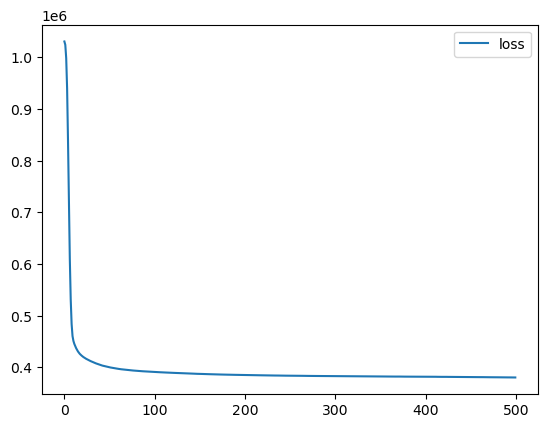

In [35]:
loss_df = pd.DataFrame(loss.history)

loss_df.loc[:,['loss']].plot()

<h1> Можно заметить, что с увеличением числа Эпох после 50 ошибка особо не изменяется <h1>

<h1> Градиентный бустинг Sci-kit<h1>

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

In [48]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
gb.score(X_test, y_test)
gb.score(X_test, y_test)

0.8971818641956082

In [38]:
# попробуем с mae
gb = GradientBoostingRegressor(loss = 'absolute_error')
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

0.8066440350358133

In [39]:
y_pred = gb.predict(X_test)
mean_absolute_error(y_test, y_pred)

156048.7493583215

<h1> Градиентный бустинг Cat-boost<h1>

In [40]:
pip install catboost

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [41]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()

In [42]:
cat.fit(X_train,y_train,verbose=False)

In [50]:
cat.score(X_test, y_test)
cat.score(X_train, y_train)

0.98017322787429

In [44]:
y_pred = cat.predict(X_test)
mean_absolute_error(y_test, y_pred)

69133.14141876393

<h1>
Вывод: изначально датасет был не очень хорошим, так как (скорее всего) не было фичей с высокой корреляцией с таргетом. Поэтому обычная линейная регрессия, Ridge, Lasso и SVM показали плохие результаты и большие ошибки.  
<h1>

<h1> 
    Нейронная сеть показала более хорошие результаты (разница в MAE около 10%), чем предыдущие методы, но ,учитывая скорость ее тренировки, она не выглядит привлекательнее чем первые методы.<h1>

<h1> Лучше всего себя показали Случайные деревья и Градиентный бустинг. Случайные деревья оказались чуть хуже чем CatBoost. Но обе модели на 5-6% лучше чем градиентный бустинг от Scikit-learn<h1>